In [6]:
# Age (numeric)
# Sex (text: male, female)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
# Risk (Value target - Good or Bad Risk)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [12]:
df = pd.read_csv('german_credit_risk.zip',compression='zip')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [14]:
df.shape

(1000, 10)

#### Check null Values

In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [17]:
cat_cols = df.dtypes[df.dtypes=='object'].index
# cat_cols = df.select_dtypes(include='object').columns

num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')
Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')


In [18]:
for i in cat_cols:
    print(i,df[i].unique())

Sex ['male' 'female']
Housing ['own' 'free' 'rent']
Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account ['little' 'moderate' nan 'rich']
Purpose ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk ['good' 'bad']


In [19]:
df['Risk'].value_counts(dropna=True)

good    700
bad     300
Name: Risk, dtype: int64

In [20]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

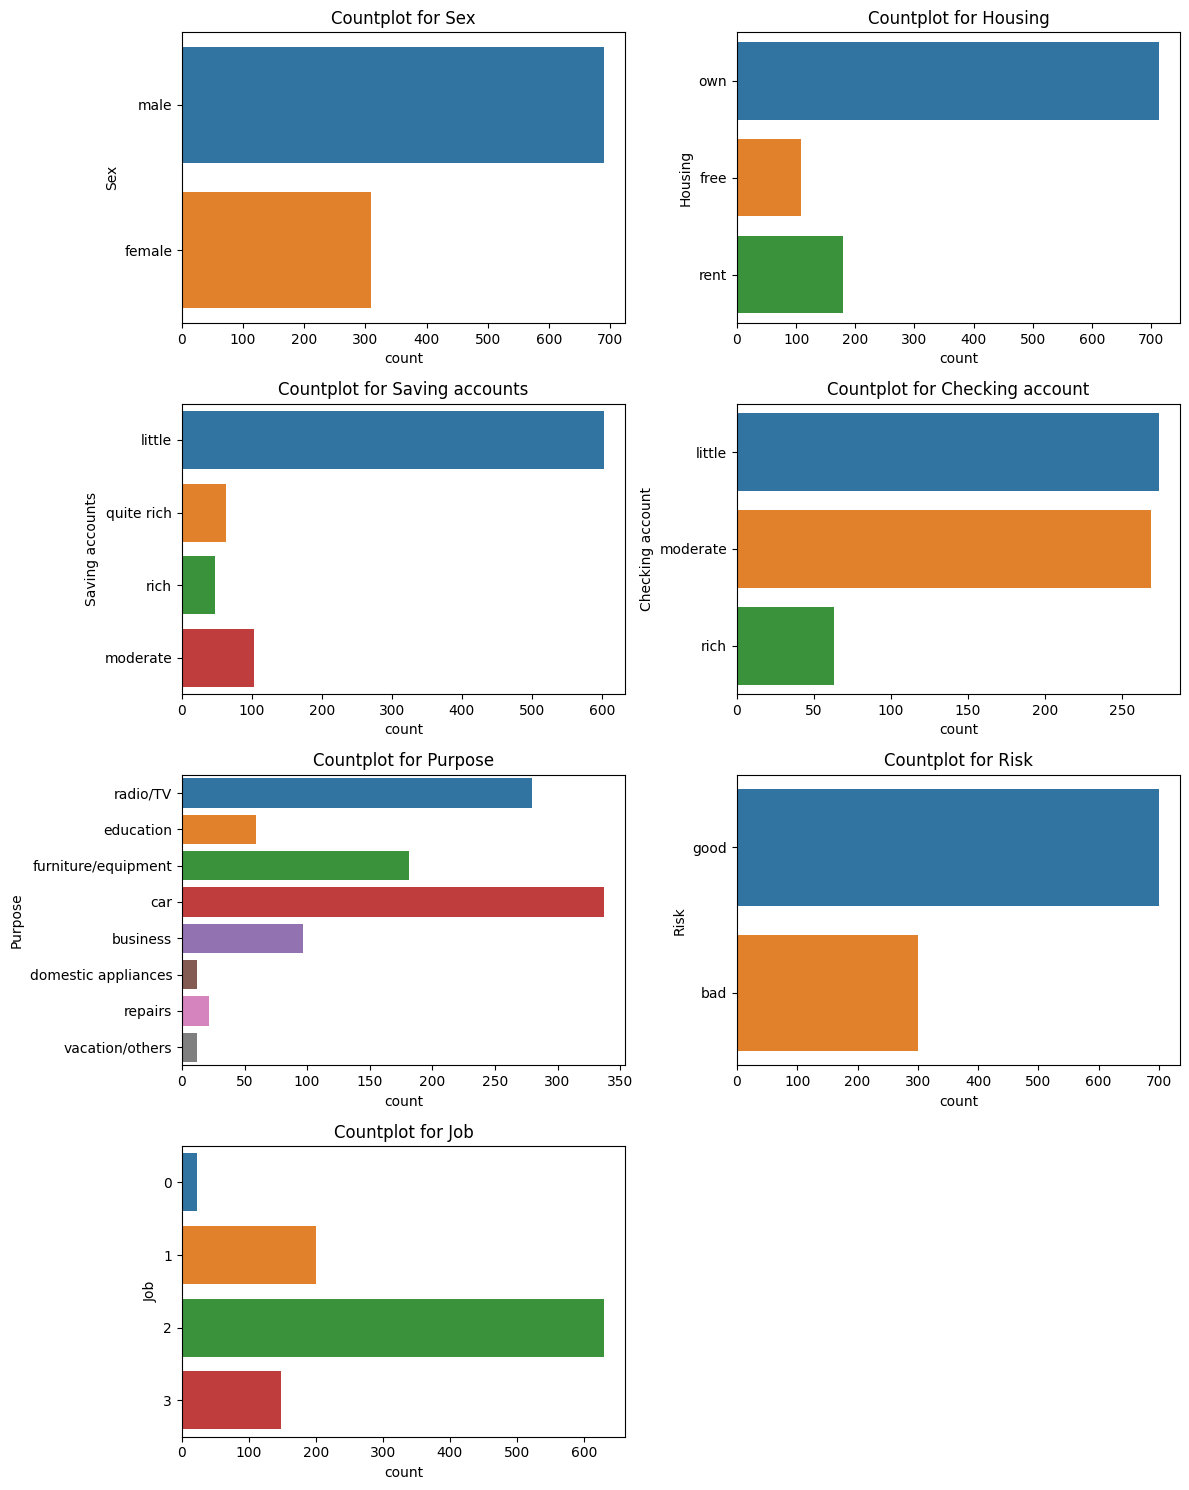

In [21]:
cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 
        'Purpose','Risk','Job']

plt.figure(figsize=(12,15))
for i in range(len(cols)): 
    plt.subplot(4,2,i+1)  
    sns.countplot(y=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [24]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


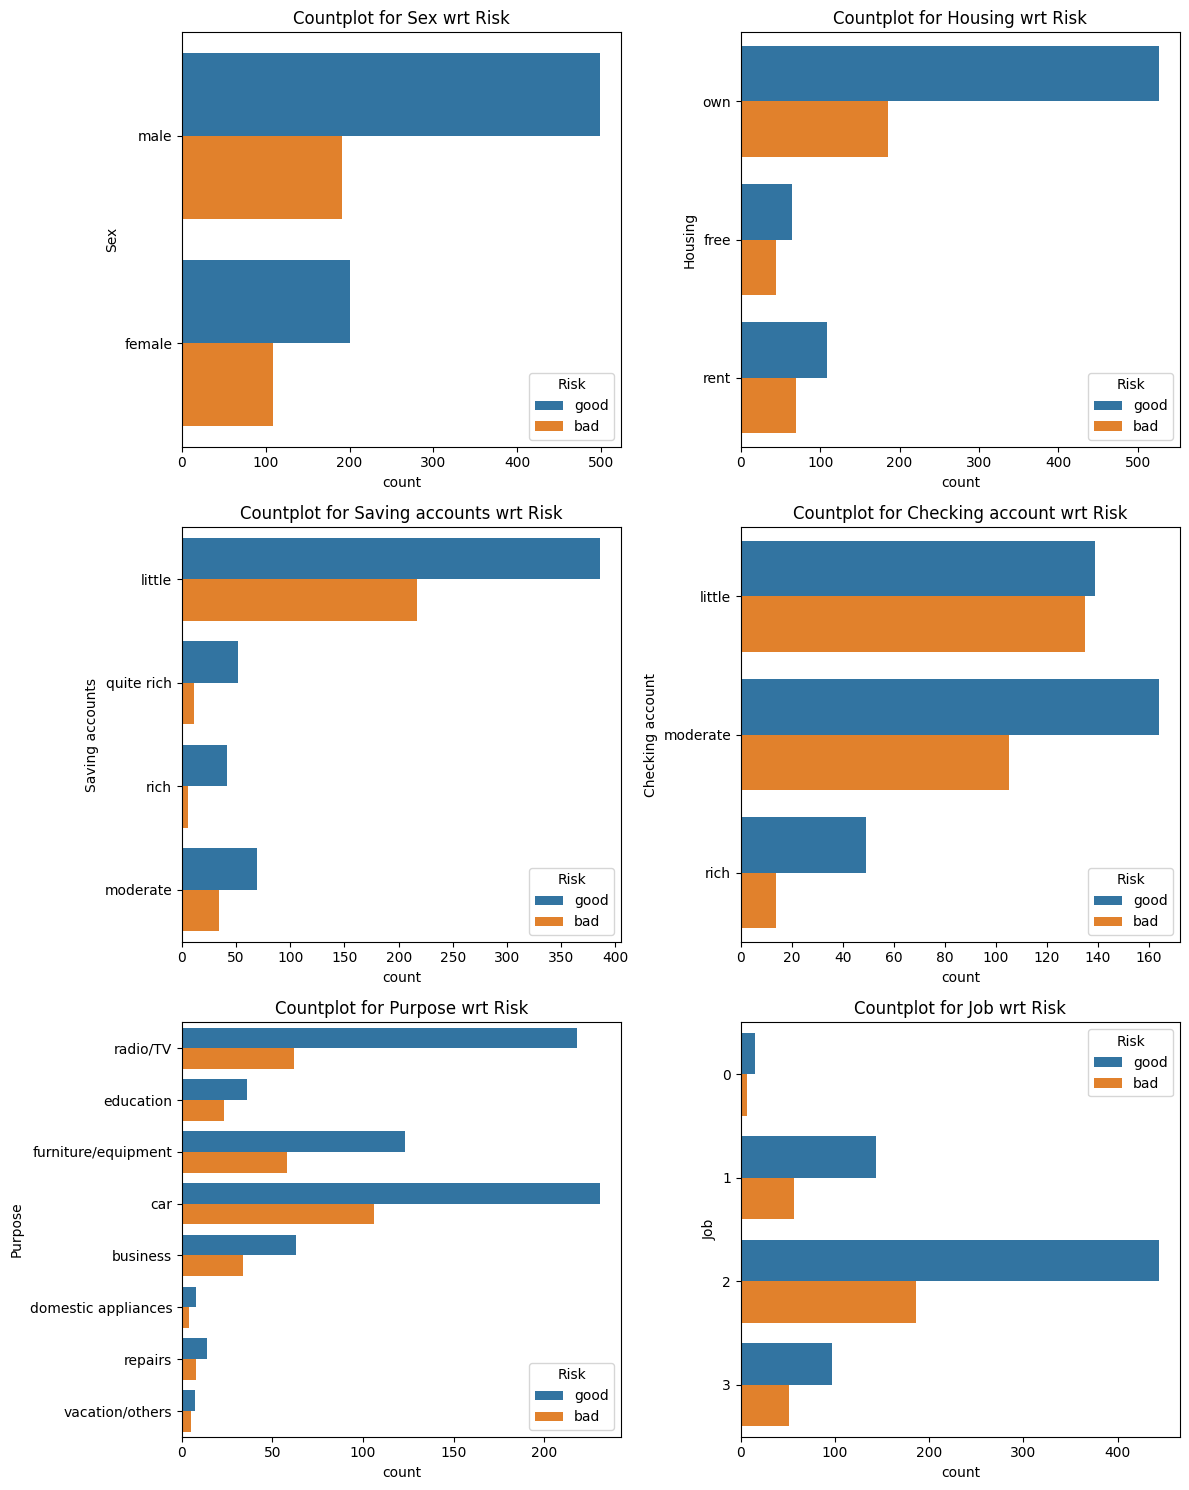

In [25]:
cols = ['Sex', 'Housing', 'Saving accounts', 
        'Checking account', 'Purpose','Job']

plt.figure(figsize=(12,15))
for i in range(len(cols)): 
    plt.subplot(3,2,i+1)  
    sns.countplot(y=df[cols[i]],hue=df['Risk'])
    plt.title(f'Countplot for {cols[i]} wrt Risk')

plt.tight_layout()
plt.show()

In [26]:
num_cols

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [27]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [28]:
df['Duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

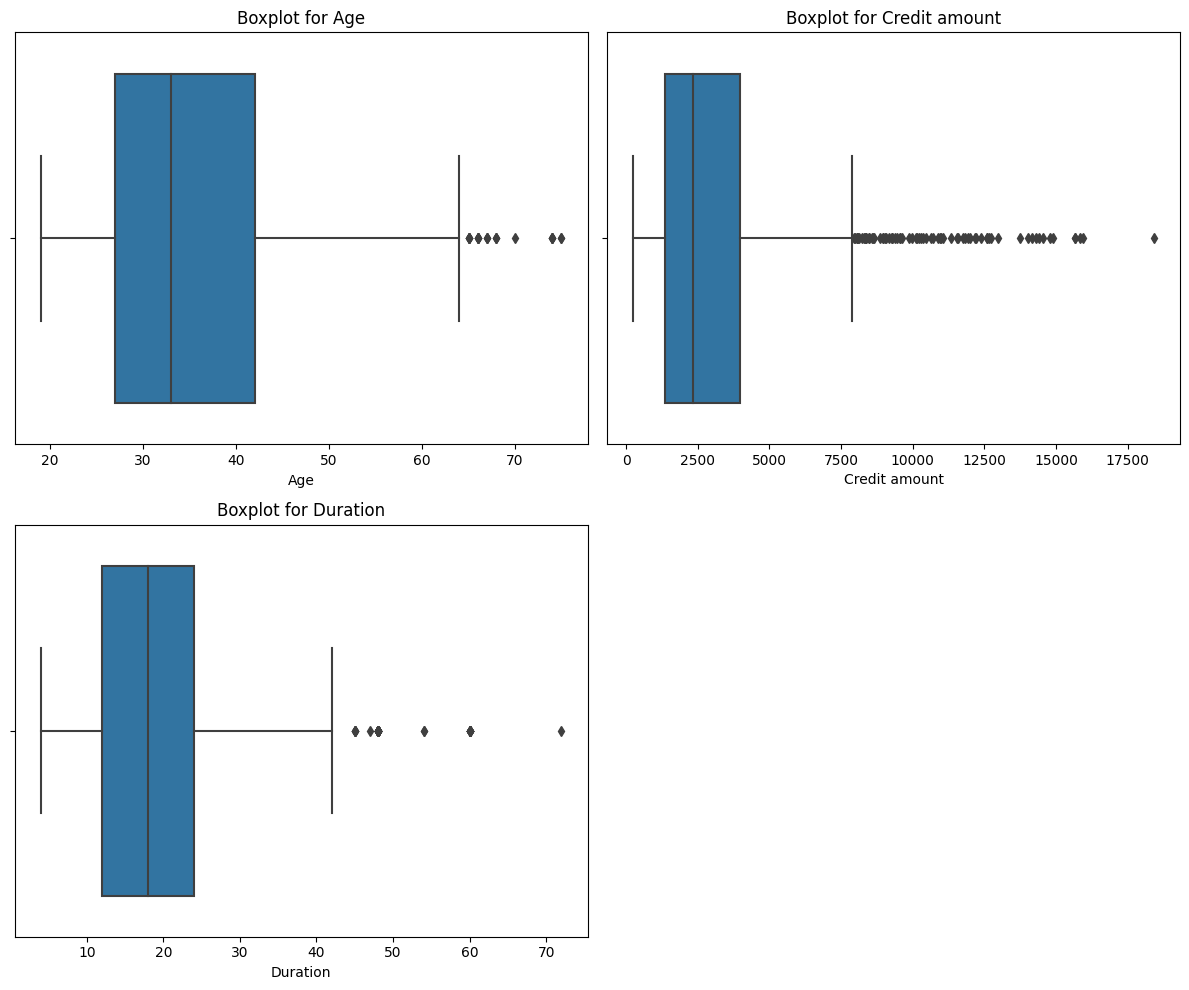

In [30]:
cols = ['Age','Credit amount', 'Duration']

plt.figure(figsize=(12,10))
for i in range(len(cols)): 
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

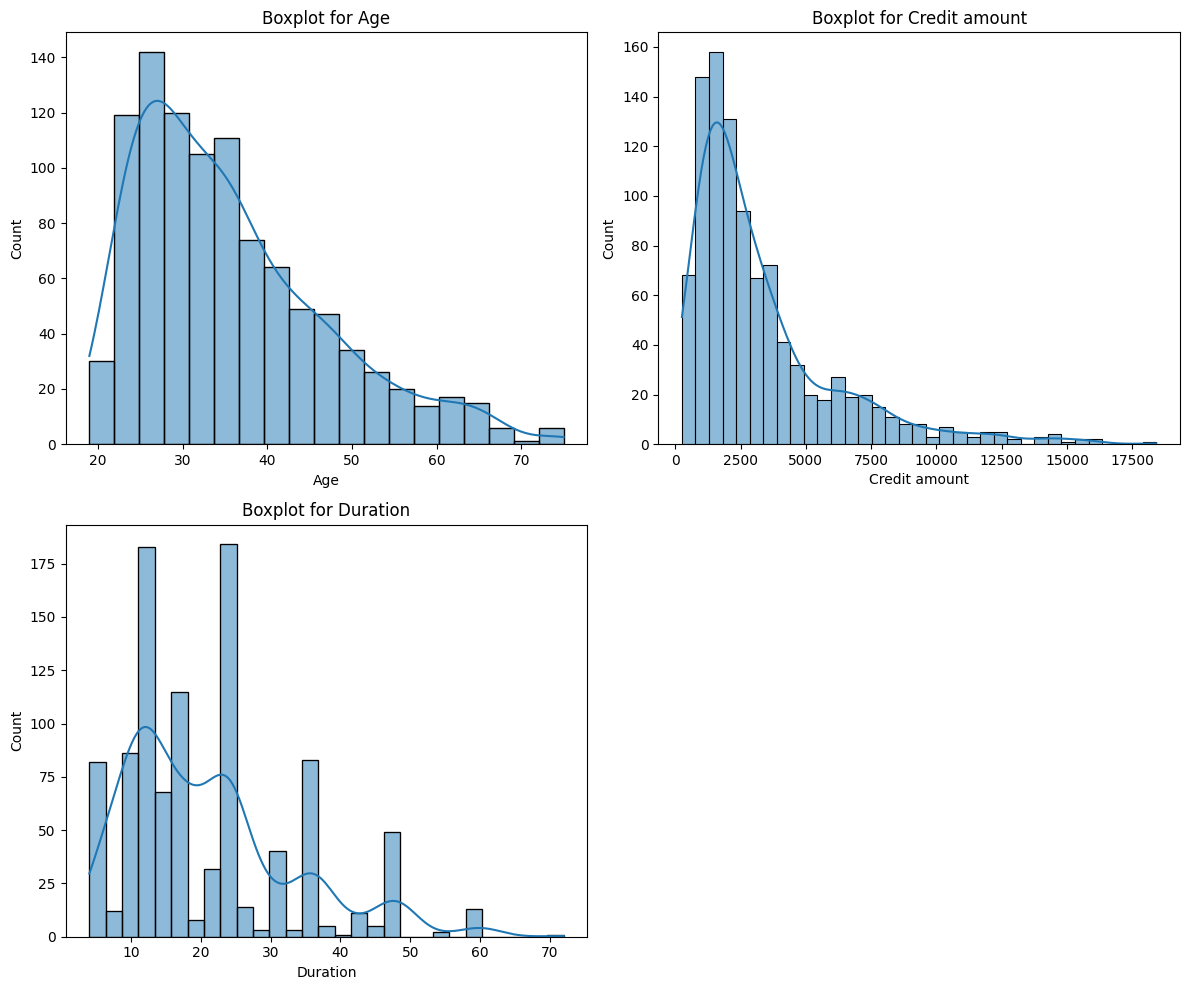

In [31]:
cols = ['Age','Credit amount', 'Duration']

plt.figure(figsize=(12,10))
for i in range(len(cols)): 
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [33]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Saving accounts     183
Checking account    394
dtype: int64

In [34]:
df.groupby(['Risk','Saving accounts'])['Saving accounts'].count()

Risk  Saving accounts
bad   little             217
      moderate            34
      quite rich          11
      rich                 6
good  little             386
      moderate            69
      quite rich          52
      rich                42
Name: Saving accounts, dtype: int64

In [33]:
# df['Saving accounts'].value_counts()

In [35]:
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')

In [36]:
df['Saving accounts'].value_counts()

little        603
Unknown       183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [37]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [38]:
df.groupby(['Risk','Checking account'])['Checking account'].count()

Risk  Checking account
bad   little              135
      moderate            105
      rich                 14
good  little              139
      moderate            164
      rich                 49
Name: Checking account, dtype: int64

In [39]:
df1 = df.copy()

In [40]:
len(df)

1000

In [46]:
df.groupby(['Risk','Checking account'])['Checking account'].count()

Risk  Checking account
bad   little              135
      moderate            105
      rich                 14
good  little              139
      moderate            164
      rich                 49
Name: Checking account, dtype: int64

In [47]:
r1 = df.groupby(['Risk'])
mode_grp = r1['Checking account'].transform(lambda x: x.mode()[0])
print(len(mode_grp))
mode_grp

1000


0      moderate
1        little
2      moderate
3      moderate
4        little
         ...   
995    moderate
996    moderate
997    moderate
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

In [52]:
len(df['Risk'])
df['Risk']

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [48]:
mode_grp.value_counts()

moderate    700
little      300
Name: Checking account, dtype: int64

In [53]:
df['Checking account'] = df['Checking account'].fillna(mode_grp)

In [54]:
df.groupby(['Risk','Checking account'])['Checking account'].count()
# Risk  Checking account
# bad   little              135
#       moderate            105
#       rich                 14
# good  little              139
#       moderate            164
#       rich                 49

Risk  Checking account
bad   little              181
      moderate            105
      rich                 14
good  little              139
      moderate            512
      rich                 49
Name: Checking account, dtype: int64

In [55]:
df['Checking account'].value_counts()

moderate    617
little      320
rich         63
Name: Checking account, dtype: int64

In [56]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [57]:
df['Duration'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

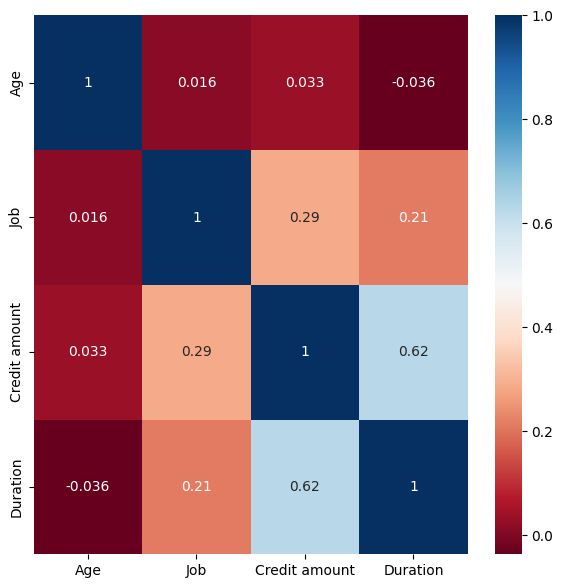

In [58]:
corr = df[num_cols].corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='RdBu')  # annot= True => annotation
plt.show()

#### Outlier Treatment

In [59]:
a = df[num_cols].describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
Age,19.0,20.00,21.00,21.97,33.0,63.00,65.0,67.01,75.0
Job,0.0,0.00,0.00,1.00,2.0,3.00,3.0,3.00,3.0
Credit amount,250.0,425.83,570.02,638.70,2319.5,10961.39,12169.7,14180.39,18424.0
Duration,4.0,6.00,6.00,6.00,18.0,48.00,48.0,60.00,72.0


In [60]:
df[df['Duration']>60].shape

(1, 10)

In [61]:
cols_right_skewed = ['Age','Credit amount','Duration']

def upper_outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [62]:
df[cols_right_skewed] = df[cols_right_skewed].apply(upper_outlier_treatment)

In [63]:
cols_left_skewed = ['Age','Credit amount']

def lower_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [64]:
df[cols_left_skewed] = df[cols_left_skewed].apply(lower_outlier_treatment)

In [66]:
a = df[num_cols].describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
Age,20.00,20.0000,21.00,21.97,33.0,63.00,65.0,67.0001,67.01
Job,0.00,0.0000,0.00,1.00,2.0,3.00,3.0,3.0000,3.00
Credit amount,425.83,425.9983,570.02,638.70,2319.5,10961.39,12169.7,14179.0139,14180.39
Duration,4.00,6.0000,6.00,6.00,18.0,48.00,48.0,60.0000,60.00


#### Encoding

In [67]:
df.dtypes

Age                 float64
Sex                  object
Job                   int64
Housing              object
Saving accounts      object
Checking account     object
Credit amount       float64
Duration              int64
Purpose              object
Risk                 object
dtype: object

In [74]:
cols = ['Sex','Housing','Saving accounts','Checking account','Purpose']

df_dum = pd.get_dummies(data=df,columns=cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1000, 21)
Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')


In [76]:
df['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [ ]:
### Majority : minority  : 70:30, 85:15  or more and Minority class is significant
# Inference = > Data Imbalance => Synthentic Data => Minority class

# Setsosa :  100
# Versicolor :  75
# Virginica : 35


#### Select x and y

In [78]:
x = df_dum.drop(['Risk'],axis=1)  # independent features
y = df_dum['Risk']                # dependent feature
print(x.shape)
print(y.shape)

(1000, 20)
(1000,)


In [79]:
x.dtypes

Age                            float64
Job                              int64
Credit amount                  float64
Duration                         int64
Sex_male                         uint8
Housing_own                      uint8
Housing_rent                     uint8
Saving accounts_little           uint8
Saving accounts_moderate         uint8
Saving accounts_quite rich       uint8
Saving accounts_rich             uint8
Checking account_moderate        uint8
Checking account_rich            uint8
Purpose_car                      uint8
Purpose_domestic appliances      uint8
Purpose_education                uint8
Purpose_furniture/equipment      uint8
Purpose_radio/TV                 uint8
Purpose_repairs                  uint8
Purpose_vacation/others          uint8
dtype: object

#### Split data into train and test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 20)
(300, 20)
(700,)
(300,)


In [82]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [83]:
from sklearn.metrics import *

In [89]:
def eval_model(model,x_train,x_test,y_train,y_test,model_name):
    "model : instance of ML model"
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    pre_good = precision_score(y_test,ypred,pos_label='good')
    rec_good = recall_score(y_test,ypred,pos_label='good')
    res = pd.DataFrame({'Train_acc':train_acc,'Test_Acc':test_acc,
                        'Pre_Good':pre_good,'Rec_Good':rec_good},
                      index=[model_name])
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    return res,ypred

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### 1) Log Reg

In [104]:
lr1  = LogisticRegression(max_iter=1000,random_state=25)
lr1_res,ypred_lr1 = eval_model(lr1,x_train, x_test, y_train, y_test,'Log_Reg')

# [TN FN]
# [FP TP]

[[ 36  46]
 [ 33 185]]
              precision    recall  f1-score   support

         bad       0.52      0.44      0.48        82
        good       0.80      0.85      0.82       218

    accuracy                           0.74       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.72      0.74      0.73       300



In [105]:
lr1_res

,Train_acc,Test_Acc,Pre_Good,Rec_Good
Log_Reg,0.768571,0.736667,0.800866,0.848624


In [106]:
ypred_proba_lr1  = lr1.predict_proba(x_test)
print(ypred_proba_lr1[:5])

[[0.08929122 0.91070878]
 [0.03425037 0.96574963]
 [0.45720525 0.54279475]
 [0.55398391 0.44601609]
 [0.66052992 0.33947008]]


In [107]:
from sklearn.metrics import roc_auc_score,roc_curve
# TPR, Thresh, FPR

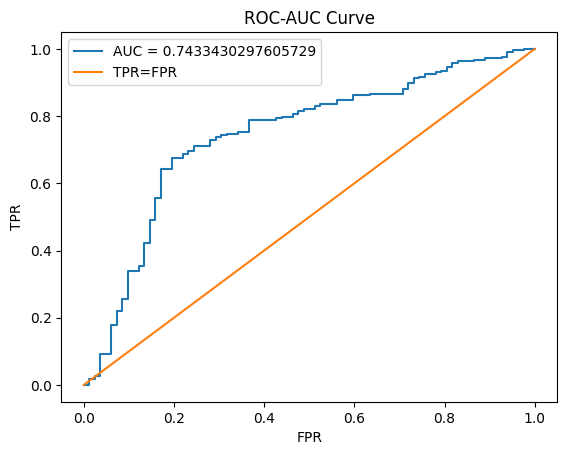

In [108]:
fpr,tpr, thresh = roc_curve(y_test,ypred_proba_lr1[:,1],pos_label='good')
auc_score = roc_auc_score(y_test,ypred_proba_lr1[:,1])
plt.plot(fpr,tpr,label=f'AUC = {str(auc_score)}')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC-AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [98]:
### Best Threshold

# 1) thresh[np.argmax(tpr-fpr)]
# 2) thresh[np.argmax(tpr*(1-fpr)]
# 3) thresh[np.argmax(np.sqrt(tpr*(1-fpr))]

In [109]:
bthresh1 = thresh[np.argmax(tpr-fpr)]
print(bthresh1)

0.7581284547922027


In [110]:
bthresh2 = thresh[np.argmax(tpr*(1-fpr))]
print(bthresh2)

0.7581284547922027


In [111]:
ypred_lr1_new = np.where(ypred_proba_lr1[:,1]>bthresh2,1,0)
# ypred_lr1_new = np.where(ypred_proba_lr1[:,1]>bthresh2,'good','bad')
print(ypred_lr1_new[:10])

[1 1 0 0 0 0 0 1 0 1]


In [113]:
y_test_new = np.where(y_test=='good',1,0)
print(y_test_new[:5])

[1 1 0 1 1]


In [115]:
cm_new = confusion_matrix(y_test_new,ypred_lr1_new)
crep_new = classification_report(y_test_new,ypred_lr1_new)
print(cm_new)
print(crep_new)

[[ 66  16]
 [ 72 146]]
              precision    recall  f1-score   support

           0       0.48      0.80      0.60        82
           1       0.90      0.67      0.77       218

    accuracy                           0.71       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.71      0.72       300



### Decision Tree Model

In [123]:
dt1 = DecisionTreeClassifier(criterion='gini',random_state=10) 
dt1_res,ypred_dt1 = eval_model(dt1, x_train, x_test, y_train, y_test,'DT1(No Pruning)')
dt1_res

[[ 43  39]
 [ 61 157]]
              precision    recall  f1-score   support

         bad       0.41      0.52      0.46        82
        good       0.80      0.72      0.76       218

    accuracy                           0.67       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.70      0.67      0.68       300



,Train_acc,Test_Acc,Pre_Good,Rec_Good
DT1(No Pruning),1.0,0.666667,0.80102,0.720183


In [124]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=10) 
dt2_res,ypred_dt2 = eval_model(dt2, x_train, x_test, y_train, y_test,'DT2(with Pruning)')
dt2_res

[[ 39  43]
 [ 40 178]]
              precision    recall  f1-score   support

         bad       0.49      0.48      0.48        82
        good       0.81      0.82      0.81       218

    accuracy                           0.72       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.72      0.72      0.72       300



,Train_acc,Test_Acc,Pre_Good,Rec_Good
DT2(with Pruning),0.855714,0.723333,0.80543,0.816514


#### Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score

In [129]:
criterion = ['gini','entropy']
max_depth = [4,5,6,7,8]
min_samples_split = [8,10,12,14]
# combinatins = 2*5*4 = 40
for i in criterion:
    for j in max_depth:
        for k in min_samples_split:
            model = DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_split=k)
            scores = cross_val_score(model,x_train,y_train,cv=5)
            print('Cri:',i,'Depth',j,'MSS:',k,'=> Mean Scores',scores.mean())
            print('*'*30)

Cri: gini Depth 4 MSS: 8 => Mean Scores 0.7485714285714286
******************************
Cri: gini Depth 4 MSS: 10 => Mean Scores 0.7557142857142857
******************************
Cri: gini Depth 4 MSS: 12 => Mean Scores 0.7528571428571429
******************************
Cri: gini Depth 4 MSS: 14 => Mean Scores 0.7571428571428571
******************************
Cri: gini Depth 5 MSS: 8 => Mean Scores 0.7171428571428572
******************************
Cri: gini Depth 5 MSS: 10 => Mean Scores 0.7114285714285715
******************************
Cri: gini Depth 5 MSS: 12 => Mean Scores 0.7157142857142857
******************************
Cri: gini Depth 5 MSS: 14 => Mean Scores 0.7214285714285714
******************************
Cri: gini Depth 6 MSS: 8 => Mean Scores 0.7271428571428571
******************************
Cri: gini Depth 6 MSS: 10 => Mean Scores 0.7185714285714286
******************************
Cri: gini Depth 6 MSS: 12 => Mean Scores 0.7185714285714286
******************************
Cr

In [ ]:
# Cri: entropy Depth 4 MSS: 14 

In [130]:
criterion = ['gini','entropy']
max_depth = [4,5,6,7,8]
min_samples_split = [8,10,12,14]
for i in criterion:
    for j in max_depth:
        for k in min_samples_split:
            model = DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_split=k)
            model.fit(x_train,y_train)
            tr_scr = model.score(x_train,y_train)
            te_scr = model.score(x_test,y_test)
            print('Cri:',i,'Depth',j,'MSS:',k)
            print('Train_Score',tr_scr,'Test_Score',te_scr)
            print('*'*50)

Cri: gini Depth 4 MSS: 8
Train_Score 0.8028571428571428 Test_Score 0.7433333333333333
**************************************************
Cri: gini Depth 4 MSS: 10
Train_Score 0.8014285714285714 Test_Score 0.7433333333333333
**************************************************
Cri: gini Depth 4 MSS: 12
Train_Score 0.8014285714285714 Test_Score 0.7433333333333333
**************************************************
Cri: gini Depth 4 MSS: 14
Train_Score 0.8014285714285714 Test_Score 0.7433333333333333
**************************************************
Cri: gini Depth 5 MSS: 8
Train_Score 0.8271428571428572 Test_Score 0.74
**************************************************
Cri: gini Depth 5 MSS: 10
Train_Score 0.8257142857142857 Test_Score 0.74
**************************************************
Cri: gini Depth 5 MSS: 12
Train_Score 0.8257142857142857 Test_Score 0.74
**************************************************
Cri: gini Depth 5 MSS: 14
Train_Score 0.82 Test_Score 0.7433333333333333
*****

In [131]:
### Inference
# Cri: entropy Depth 4 MSS: 8
# Train_Score 0.8042857142857143 Test_Score 0.75
# Cri: entropy Depth 4 MSS: 10
# Train_Score 0.8028571428571428 Test_Score 0.75

#### Hyperparameter Tuning
<pre>
1) GridSearchCV
a) Checks the model's performance on each and very possible combination of hyperparameters
across different splits and then returns the best result.
b) Time consuming

2) RandomizedSearchCV
a) Checks the model's performance on randomly selected(default = 10) combinations of hyperparameters across different splits and then returns the best result.
b) Comparatively conszumes less time


In [133]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [135]:
hparams_dt = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8],
             'min_samples_split':[8,10,12]}

# combinations = 2*5*3 = 30

In [136]:
dt_base = DecisionTreeClassifier()
gs1 = GridSearchCV(dt_base,param_grid=hparams_dt, scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12]},
             scoring='accuracy')

In [138]:
print(gs1.best_score_)
print(gs1.best_params_)
print(gs1.best_estimator_)

0.7571428571428571
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 12}
DecisionTreeClassifier(max_depth=4, min_samples_split=12)


In [ ]:
# args and kwargs

#### Model after GridSearch with best combination of Hparams

In [141]:
dt_gs1 = DecisionTreeClassifier(**gs1.best_params_)
# OR
# dt_gs1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split= 12)
dt_gs1_res,ypred_dt_gs1 = eval_model(dt_gs1,x_train,x_test,y_train,y_test,'DT_GS1')


[[ 28  54]
 [ 23 195]]
              precision    recall  f1-score   support

         bad       0.55      0.34      0.42        82
        good       0.78      0.89      0.84       218

    accuracy                           0.74       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.72      0.74      0.72       300



DecisionTreeClassifier(max_depth=4, min_samples_split=12)

In [143]:
dt_gs1_res

,Train_acc,Test_Acc,Pre_Good,Rec_Good
DT_GS1,0.801429,0.743333,0.783133,0.894495


In [144]:
gs_res = pd.DataFrame(gs1.cv_results_)
print(gs_res.shape)
gs_res.head()

(30, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010193,0.001832,0.007796,0.003653,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.778571,0.721429,0.771429,0.735714,0.764286,0.754286,0.021946,5
1,0.010593,0.003497,0.006199,0.001719,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.778571,0.721429,0.771429,0.735714,0.742857,0.750000,0.021665,8
2,0.007396,0.002060,0.006797,0.003184,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.778571,0.721429,0.778571,0.742857,0.764286,0.757143,0.022131,1
3,0.009994,0.002448,0.004399,0.000491,gini,5,8,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.735714,0.685714,0.657143,0.721429,0.757143,0.711429,0.035743,27
4,0.021989,0.017044,0.009593,0.005746,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.735714,0.685714,0.657143,0.707143,0.785714,0.714286,0.044032,25


In [146]:
gs_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [148]:
gs_res = gs_res[['param_criterion', 'param_max_depth', 'param_min_samples_split',
                'mean_test_score','rank_test_score']]
gs_res = gs_res.sort_values('rank_test_score')
gs_res

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
2,gini,4,12,0.757143,1
17,entropy,4,12,0.757143,1
16,entropy,4,10,0.755714,3
15,entropy,4,8,0.755714,3
0,gini,4,8,0.754286,5
21,entropy,6,8,0.752857,6
22,entropy,6,10,0.751429,7
1,gini,4,10,0.750000,8
23,entropy,6,12,0.750000,8
18,entropy,5,8,0.738571,10


### 2) RandomizedSearchCV

In [149]:
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8], 'min_samples_split': [8, 10, 12]}


In [151]:
dt_base2 = DecisionTreeClassifier(random_state=40)

rs1 = RandomizedSearchCV(dt_base2,param_distributions=hparams_dt,scoring='accuracy',cv=5)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12]},
                   scoring='accuracy')

In [152]:
print(rs1.best_score_)
print(rs1.best_params_)

0.7571428571428571
{'min_samples_split': 12, 'max_depth': 4, 'criterion': 'entropy'}


#### DecisionTreeModel after RandomizedSearch with best combination of hparams

In [154]:
dt_rs1 = DecisionTreeClassifier(**rs1.best_params_)
dt_rs1_res,ypred_dt_rs1 = eval_model(dt_rs1,x_train,x_test,y_train,y_test,'DT_RS1')
dt_rs1_res

[[ 28  54]
 [ 23 195]]
              precision    recall  f1-score   support

         bad       0.55      0.34      0.42        82
        good       0.78      0.89      0.84       218

    accuracy                           0.74       300
   macro avg       0.67      0.62      0.63       300
weighted avg       0.72      0.74      0.72       300



,Train_acc,Test_Acc,Pre_Good,Rec_Good
DT_RS1,0.8,0.743333,0.783133,0.894495


In [156]:
rs_res = pd.DataFrame(rs1.cv_results_)
print(rs_res.shape)
rs_res.head()

(10, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008195,0.001830,0.005596,0.001623,10,4,entropy,"{'min_samples_split': 10, 'max_depth': 4, 'cri...",0.771429,0.721429,0.778571,0.735714,0.771429,0.755714,0.022768,2
1,0.008994,0.002827,0.004379,0.001868,12,4,entropy,"{'min_samples_split': 12, 'max_depth': 4, 'cri...",0.771429,0.721429,0.778571,0.742857,0.771429,0.757143,0.021665,1
2,0.007595,0.002725,0.003399,0.000799,12,4,gini,"{'min_samples_split': 12, 'max_depth': 4, 'cri...",0.778571,0.721429,0.778571,0.742857,0.757143,0.755714,0.021853,2
3,0.004997,0.000894,0.003400,0.000799,8,4,gini,"{'min_samples_split': 8, 'max_depth': 4, 'crit...",0.778571,0.721429,0.764286,0.735714,0.757143,0.751429,0.020404,6
4,0.005601,0.001205,0.003394,0.001495,8,4,entropy,"{'min_samples_split': 8, 'max_depth': 4, 'crit...",0.771429,0.721429,0.778571,0.735714,0.771429,0.755714,0.022768,2
